# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [3]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Perplexity_1.csv")
df.head()

,userName,score,at,content
0,Pande Sutha,5,2024-08-01 04:00:08,mantap
1,Choirul Miftah AL Batra,4,2024-08-01 03:34:50,bagus sekali aplikasinya
2,Rizal Bgs13,1,2024-08-01 03:02:17,Error
3,07_EMIR MAISAN ARIYASAFAAT XI A2,5,2024-08-01 02:04:20,"Sangat amat membantu, setiap jawaban yg diberi..."
4,Ali Furqan,5,2024-07-31 17:38:55,bagus banget


In [4]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,mantap
1,bagus sekali aplikasinya
2,Error
3,"Sangat amat membantu, setiap jawaban yg diberi..."
4,bagus banget
...,...
1081,"Bagus dan membantu, tetapi bahasanya jawaban b..."
1082,"Seiring berjalannya waktu, jaman terus maju da..."
1083,Good Riddance! Akhirnya Aplikasi Versi Android...
1084,i dunno what should i write


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1086 non-null   object
dtypes: object(1)
memory usage: 8.6+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,1086
unique,741
top,bagus
freq,51


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(1086, 1)

In [8]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong

df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

,0
content,0


In [12]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(741, 1)

In [13]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

<ipython-input-15-593aa74adfad>:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()


,content,cleaning
0,mantap,mantap
1,bagus sekali aplikasinya,bagus sekali aplikasinya
2,Error,error
3,"Sangat amat membantu, setiap jawaban yg diberi...",sangat amat membantu setiap jawaban yg diberik...
4,bagus banget,bagus banget
...,...,...
1081,"Bagus dan membantu, tetapi bahasanya jawaban b...",bagus dan membantu tetapi bahasanya jawaban ba...
1082,"Seiring berjalannya waktu, jaman terus maju da...",seiring berjalannya waktu jaman terus maju dan...
1083,Good Riddance! Akhirnya Aplikasi Versi Android...,good riddance akhirnya aplikasi versi android ...
1084,i dunno what should i write,i dunno what should i write


# **Normalization**

In [16]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "gbs" : "gabisa",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,mantap,mantap,mantap
1,bagus sekali aplikasinya,bagus sekali aplikasinya,bagus sekali aplikasinya
2,Error,error,error
3,"Sangat amat membantu, setiap jawaban yg diberi...",sangat amat membantu setiap jawaban yg diberik...,sangat amat membantu setiap jawaban yang diber...
4,bagus banget,bagus banget,bagus banget
...,...,...,...
1081,"Bagus dan membantu, tetapi bahasanya jawaban b...",bagus dan membantu tetapi bahasanya jawaban ba...,bagus dan membantu tetapi bahasanya jawaban ba...
1082,"Seiring berjalannya waktu, jaman terus maju da...",seiring berjalannya waktu jaman terus maju dan...,seiring berjalannya waktu jaman terus maju dan...
1083,Good Riddance! Akhirnya Aplikasi Versi Android...,good riddance akhirnya aplikasi versi android ...,good riddance akhirnya aplikasi versi android ...
1084,i dunno what should i write,i dunno what should i write,i dunno what should i write


# **Stopwords**

In [17]:
# Menginstall Library Sastrawi

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.6 MB/s eta 0:00:00


In [18]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "bisa", "ga",
                   "udah", "tapi", "sudah", "gak", "lagi", "sama", "lebih"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,mantap,mantap,mantap,mantap
1,bagus sekali aplikasinya,bagus sekali aplikasinya,bagus sekali aplikasinya,bagus aplikasinya
2,Error,error,error,error
3,"Sangat amat membantu, setiap jawaban yg diberi...",sangat amat membantu setiap jawaban yg diberik...,sangat amat membantu setiap jawaban yang diber...,amat membantu setiap jawaban diberikan dicantu...
4,bagus banget,bagus banget,bagus banget,bagus banget
...,...,...,...,...
1081,"Bagus dan membantu, tetapi bahasanya jawaban b...",bagus dan membantu tetapi bahasanya jawaban ba...,bagus dan membantu tetapi bahasanya jawaban ba...,bagus membantu tetapi bahasanya jawaban bahasa...
1082,"Seiring berjalannya waktu, jaman terus maju da...",seiring berjalannya waktu jaman terus maju dan...,seiring berjalannya waktu jaman terus maju dan...,seiring berjalannya waktu jaman terus maju ber...
1083,Good Riddance! Akhirnya Aplikasi Versi Android...,good riddance akhirnya aplikasi versi android ...,good riddance akhirnya aplikasi versi android ...,good riddance akhirnya aplikasi versi android ...
1084,i dunno what should i write,i dunno what should i write,i dunno what should i write,i dunno what should i write


# **Tokenize**

In [19]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,mantap,mantap,mantap,mantap,[mantap]
1,bagus sekali aplikasinya,bagus sekali aplikasinya,bagus sekali aplikasinya,bagus aplikasinya,"[bagus, aplikasinya]"
2,Error,error,error,error,[error]
3,"Sangat amat membantu, setiap jawaban yg diberi...",sangat amat membantu setiap jawaban yg diberik...,sangat amat membantu setiap jawaban yang diber...,amat membantu setiap jawaban diberikan dicantu...,"[amat, membantu, setiap, jawaban, diberikan, d..."
4,bagus banget,bagus banget,bagus banget,bagus banget,"[bagus, banget]"
...,...,...,...,...,...
1081,"Bagus dan membantu, tetapi bahasanya jawaban b...",bagus dan membantu tetapi bahasanya jawaban ba...,bagus dan membantu tetapi bahasanya jawaban ba...,bagus membantu tetapi bahasanya jawaban bahasa...,"[bagus, membantu, tetapi, bahasanya, jawaban, ..."
1082,"Seiring berjalannya waktu, jaman terus maju da...",seiring berjalannya waktu jaman terus maju dan...,seiring berjalannya waktu jaman terus maju dan...,seiring berjalannya waktu jaman terus maju ber...,"[seiring, berjalannya, waktu, jaman, terus, ma..."
1083,Good Riddance! Akhirnya Aplikasi Versi Android...,good riddance akhirnya aplikasi versi android ...,good riddance akhirnya aplikasi versi android ...,good riddance akhirnya aplikasi versi android ...,"[good, riddance, akhirnya, aplikasi, versi, an..."
1084,i dunno what should i write,i dunno what should i write,i dunno what should i write,i dunno what should i write,"[i, dunno, what, should, i, write]"


# **Stemming**

In [20]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# df['steamming'] = df['tokenized'].apply(stemming)

# df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Perplexity_1.csv', index = False)


In [22]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_​​Perplexity_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,mantap
1,bagus aplikasi
2,error
3,amat bantu tiap jawab beri cantum juga sumber ...
4,bagus
...,...
736,bagus bantu tetapi bahasa jawab bahasa inggris...
737,iring jalan waktu jaman terus maju kembang pes...
738,good riddance akhir aplikasi versi android tel...
739,i dunno what should i write


# **Translate**

In [23]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [24]:
# import pandas as pd
# from easynmt import EasyNMT

In [25]:
# # Load Data Hasil Stemming

# df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_​​Perplexity_1.csv', encoding = 'latin1')


In [26]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [27]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [ ]:
# # Imputing NaN Values

# df_values = df_steamming.fillna(method = 'pad')
# df_values

In [28]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_​​Perplexity_1.csv')

In [29]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_​​Perplexity_1.csv', index_col=0)
df_values

,steamming,steamming_en
0,mantap,Steady.
1,bagus aplikasi,good application
2,error,error
3,amat bantu tiap jawab beri cantum juga sumber ...,very help each answer Cantum be also a source ...
4,bagus,Good.
...,...,...
736,bagus bantu tetapi bahasa jawab bahasa inggris...,It's good to help. But it's all English-respon...
737,iring jalan waktu jaman terus maju kembang pes...,"As time goes on, fast blooms start from other ..."
738,good riddance akhir aplikasi versi android tel...,good riddance end of the android version appli...
739,i dunno what should i write,I dunno what should i write


# **Labeling**

In [30]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_​​Perplexity_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,mantap,Steady.
1,bagus aplikasi,good application
2,error,error
3,amat bantu tiap jawab beri cantum juga sumber ...,very help each answer Cantum be also a source ...
4,bagus,Good.
...,...,...
736,bagus bantu tetapi bahasa jawab bahasa inggris...,It's good to help. But it's all English-respon...
737,iring jalan waktu jaman terus maju kembang pes...,"As time goes on, fast blooms start from other ..."
738,good riddance akhir aplikasi versi android tel...,good riddance end of the android version appli...
739,i dunno what should i write,I dunno what should i write


In [31]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [32]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [33]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 444
Netral = 264
Negatif = 33

Total Data Seluruhnya : 741


In [34]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,mantap,Steady.,Positif
1,bagus aplikasi,good application,Positif
2,error,error,Netral
3,amat bantu tiap jawab beri cantum juga sumber ...,very help each answer Cantum be also a source ...,Positif
4,bagus,Good.,Positif
...,...,...,...
736,bagus bantu tetapi bahasa jawab bahasa inggris...,It's good to help. But it's all English-respon...,Positif
737,iring jalan waktu jaman terus maju kembang pes...,"As time goes on, fast blooms start from other ...",Positif
738,good riddance akhir aplikasi versi android tel...,good riddance end of the android version appli...,Positif
739,i dunno what should i write,I dunno what should i write,Netral


In [35]:
# Mengimplementasikan Variabel data_final

data_final = df_values
data_final

,steamming,steamming_en,sentimen
0,mantap,Steady.,Positif
1,bagus aplikasi,good application,Positif
2,error,error,Netral
3,amat bantu tiap jawab beri cantum juga sumber ...,very help each answer Cantum be also a source ...,Positif
4,bagus,Good.,Positif
...,...,...,...
736,bagus bantu tetapi bahasa jawab bahasa inggris...,It's good to help. But it's all English-respon...,Positif
737,iring jalan waktu jaman terus maju kembang pes...,"As time goes on, fast blooms start from other ...",Positif
738,good riddance akhir aplikasi versi android tel...,good riddance end of the android version appli...,Positif
739,i dunno what should i write,I dunno what should i write,Netral


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



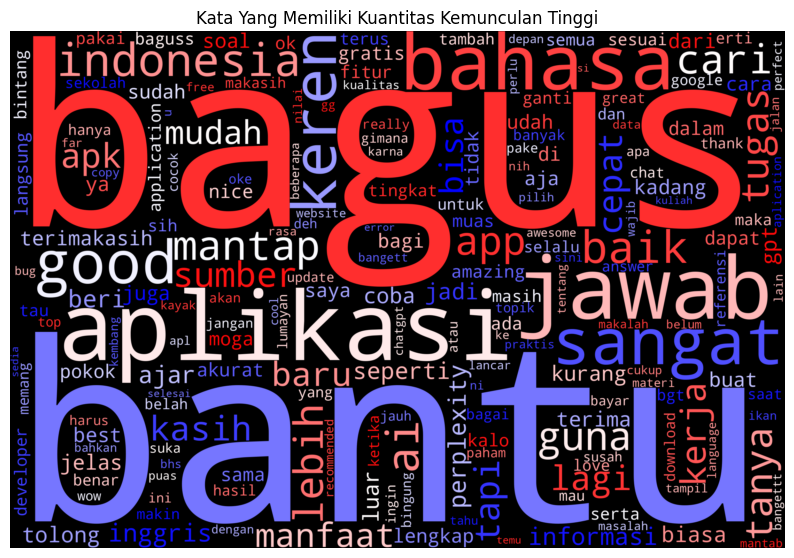

In [36]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


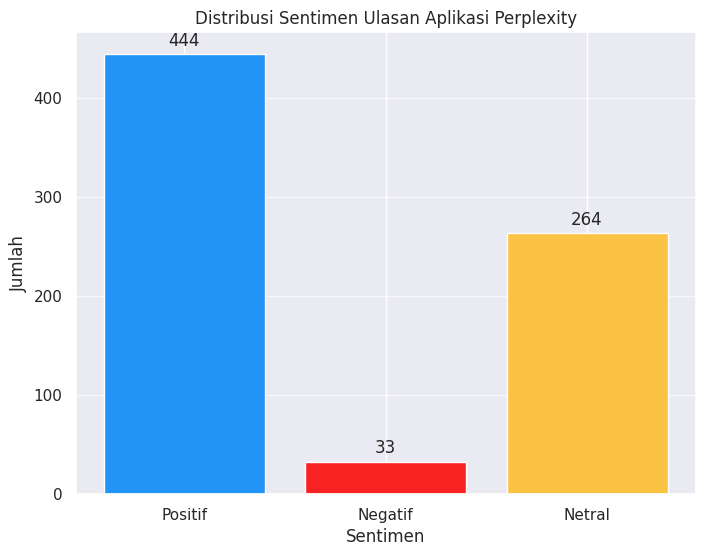

In [39]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Perplexity")


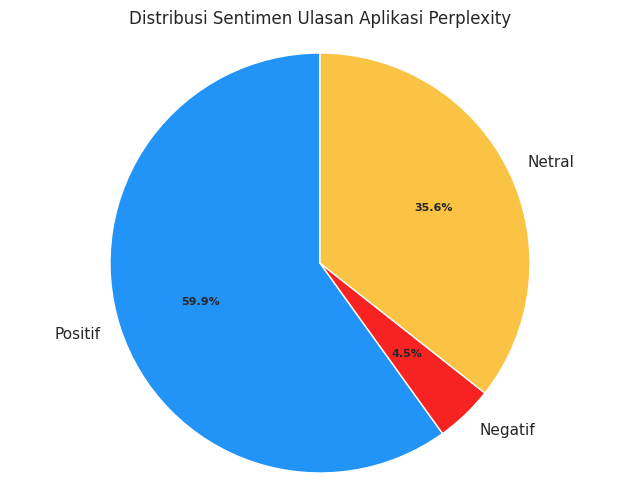

In [40]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Perplexity")

In [41]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,mantap,Steady.,Positif
1,bagus aplikasi,good application,Positif
3,amat bantu tiap jawab beri cantum juga sumber ...,very help each answer Cantum be also a source ...,Positif
4,bagus,Good.,Positif
5,keren,Cool.,Positif
...,...,...,...
735,luar biasa bantu tolong tambah bahasa indonesi...,It's amazing. Please add English to it so it's...,Positif
736,bagus bantu tetapi bahasa jawab bahasa inggris...,It's good to help. But it's all English-respon...,Positif
737,iring jalan waktu jaman terus maju kembang pes...,"As time goes on, fast blooms start from other ...",Positif
738,good riddance akhir aplikasi versi android tel...,good riddance end of the android version appli...,Positif


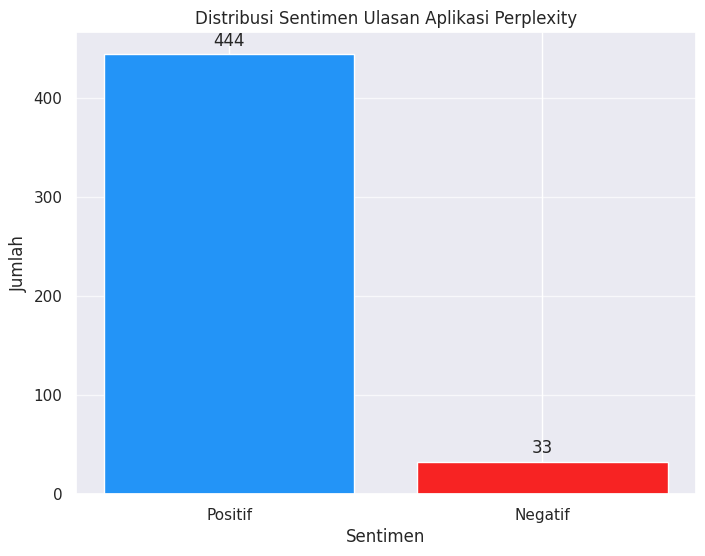

In [42]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Perplexity")


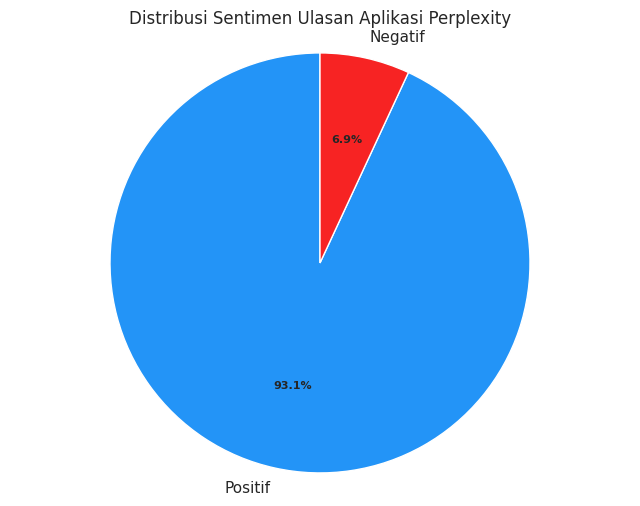

In [43]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Perplexity")

In [44]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,mantap,Steady.,0
1,bagus aplikasi,good application,0
3,amat bantu tiap jawab beri cantum juga sumber ...,very help each answer Cantum be also a source ...,0
4,bagus,Good.,0
5,keren,Cool.,0
...,...,...,...
735,luar biasa bantu tolong tambah bahasa indonesi...,It's amazing. Please add English to it so it's...,0
736,bagus bantu tetapi bahasa jawab bahasa inggris...,It's good to help. But it's all English-respon...,0
737,iring jalan waktu jaman terus maju kembang pes...,"As time goes on, fast blooms start from other ...",0
738,good riddance akhir aplikasi versi android tel...,good riddance end of the android version appli...,0


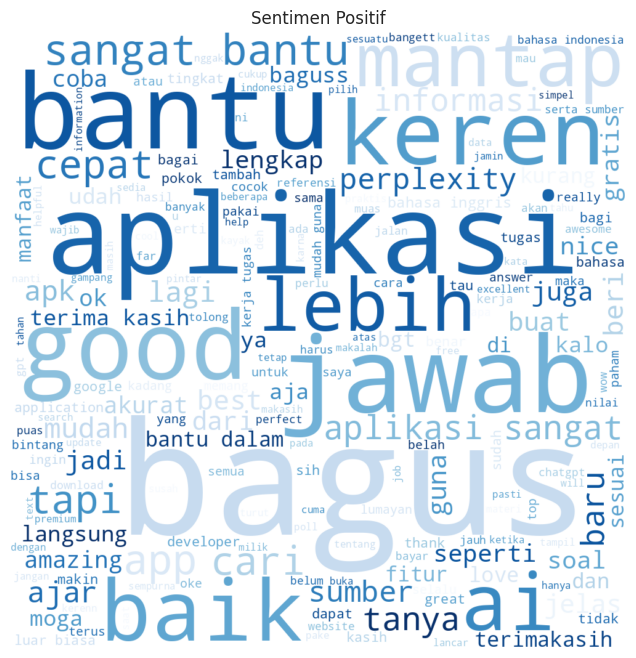

In [45]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

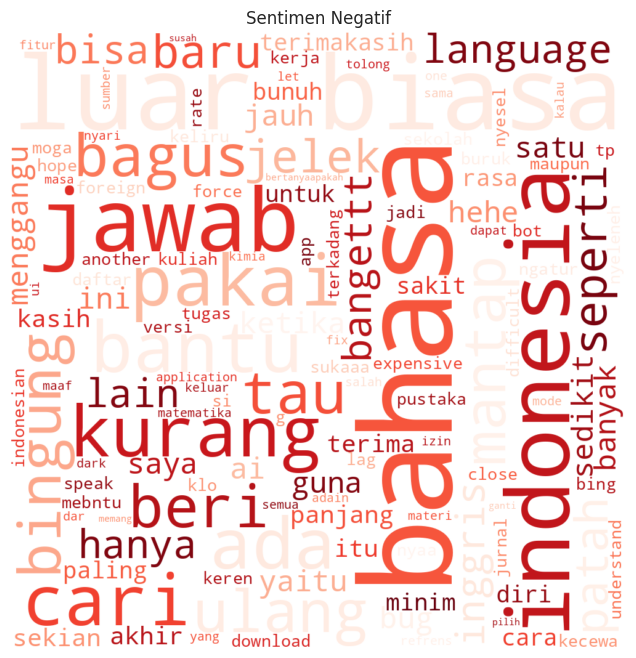

In [46]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

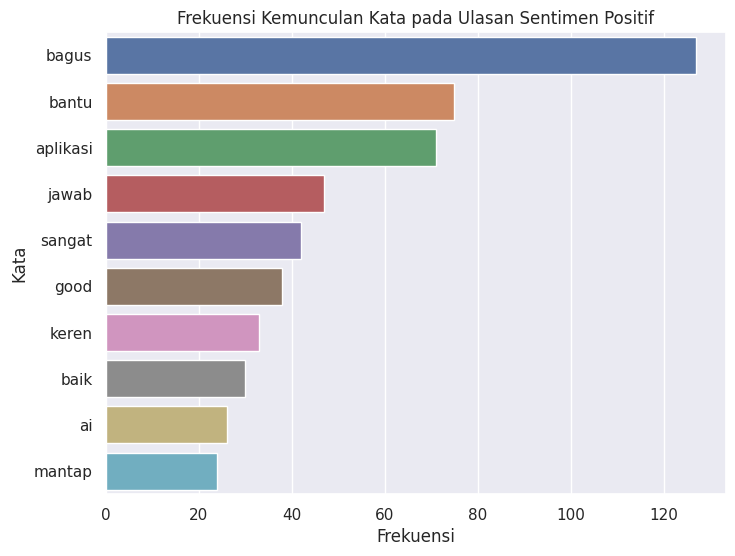

In [47]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [48]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   bagus        127
   bantu         75
aplikasi         71
   jawab         47
  sangat         42
    good         38
   keren         33
    baik         30
      ai         26
  mantap         24


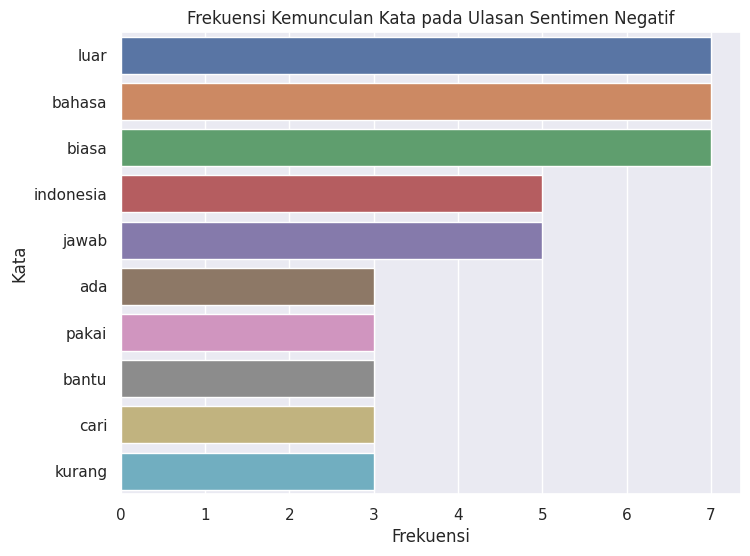

In [49]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [50]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

     kata  frekuensi
     luar          7
   bahasa          7
    biasa          7
indonesia          5
    jawab          5
      ada          3
    pakai          3
    bantu          3
     cari          3
   kurang          3


In [51]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

,count
sentimen,
0,444
1,33


# **Transormation & Data Preparation**

In [52]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [53]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [54]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

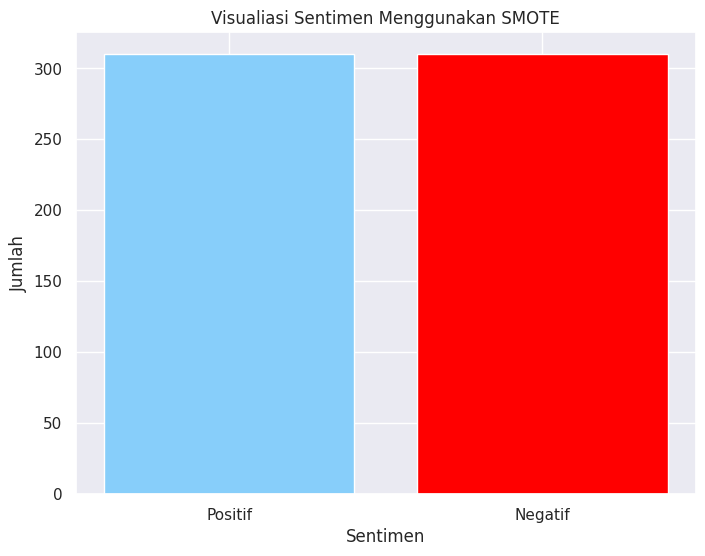

In [55]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [56]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [57]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.9375
Akurasi untuk c = 0.05: 0.9305555555555556
Akurasi untuk c = 0.25: 0.9375
Akurasi untuk c = 0.5: 0.9375
Akurasi untuk c = 0.75: 0.9444444444444444
Akurasi untuk c = 1: 0.9444444444444444


In [59]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [60]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.9444444444444444 


In [61]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.9444

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       134
           1       0.75      0.30      0.43        10

    accuracy                           0.94       144
   macro avg       0.85      0.65      0.70       144
weighted avg       0.94      0.94      0.93       144



In [62]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[133   1]
 [  7   3]]

True Positives (TP) =  133

True Negatives (TN) =  3

False Positives (FP) =  1

False Negatives (FN) =  7

Accuracy =  0.9444444444444444


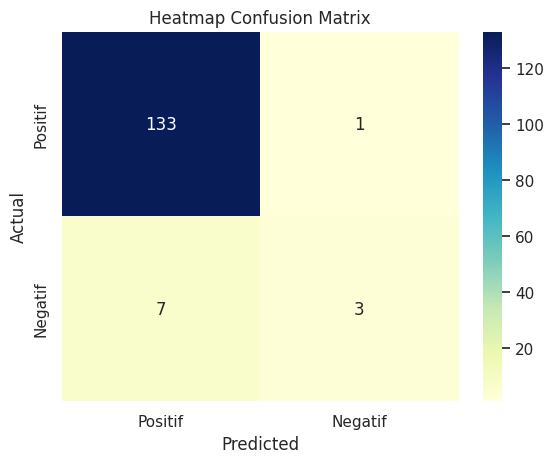

In [63]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [64]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [65]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9444


In [66]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0556


# **Testing**

In [67]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Jelek gak bisa pakai bahasa Indonesia
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 71.13%
Probabilitas: 71.12983913849754 %


In [68]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Jawabannya mudah dipahami dan fitur-fiturnya lengkap disertai dengan sumber yang jelas
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 92.70%
Probabilitas: 92.69719411693315 %
